In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import load_model

### Convert keras to TF-Lite

In [9]:
# Specify the path to the model file
model_path = "xception_v4_46_0.889.keras"

# Load the model
model = load_model(model_path)

### Using Keras for the prediction

In [10]:
import numpy as np
import tensorflow.lite as tflite
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.xception import preprocess_input

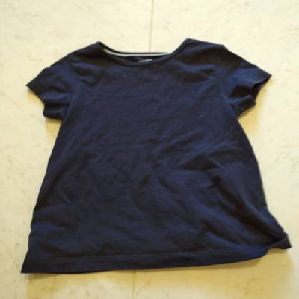

In [11]:
load_img('172950bd-f639-4ce5-bc55-d17cea7b9705.jpg', target_size=(299, 299))

In [12]:
img = load_img('172950bd-f639-4ce5-bc55-d17cea7b9705.jpg', target_size=(299, 299))

x = np.array(img)
X = np.array([x])

X = preprocess_input(X)

preds = model.predict(X)


classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]

dict(zip(classes, preds[0]))

I0000 00:00:1733899720.611393   11114 service.cc:148] XLA service 0x7f1f4c013b20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733899720.611426   11114 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2024-12-11 06:48:40.648500: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1733899720.963988   11114 cuda_dnn.cc:529] Loaded cuDNN version 90300
2024-12-11 06:48:42.088400: W external/local_xla/xla/service/gpu/nvptx_compiler.cc:930] The NVIDIA driver's CUDA version is 12.4 which is older than the PTX compiler version 12.5.82. Because the driver is older than the PTX compiler version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


I0000 00:00:1733899722.840286   11114 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


{'dress': np.float32(3.5920763),
 'hat': np.float32(-8.844744),
 'longsleeve': np.float32(2.2075944),
 'outwear': np.float32(-10.086647),
 'pants': np.float32(-12.5878105),
 'shirt': np.float32(2.2148812),
 'shoes': np.float32(-16.957153),
 'shorts': np.float32(-5.0459986),
 'skirt': np.float32(-4.0794544),
 't-shirt': np.float32(12.140417)}

### Using Tensorflowlite for the prediction

In [13]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("clothing-model.tflite", "wb") as f_out:
    f_out.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmp0u0exn3d/assets


INFO:tensorflow:Assets written to: /tmp/tmp0u0exn3d/assets


Saved artifact at '/tmp/tmp0u0exn3d'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 299, 299, 3), dtype=tf.float32, name='input_layer_3')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  139775088255888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139775088257424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139775088257616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139775088257232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139775088256656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139775088258000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139775088259344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139775088259536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139775088259152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139775088258384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139775088259

W0000 00:00:1733899729.801061   10080 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1733899729.801089   10080 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2024-12-11 06:48:49.801511: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmp0u0exn3d
2024-12-11 06:48:49.814996: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2024-12-11 06:48:49.815022: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /tmp/tmp0u0exn3d
I0000 00:00:1733899729.924897   10080 mlir_graph_optimization_pass.cc:401] MLIR V1 optimization pass is not enabled
2024-12-11 06:48:49.946555: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2024-12-11 06:48:50.798769: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /tmp/tmp0u0exn3d
2024-12-11 06:48:50.998762: I tensorflow/cc/saved_model/loader.cc:466] SavedModel 

In [14]:
interpreter = tflite.Interpreter(model_path="clothing-model.tflite")
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]['index']
output_tensor = interpreter.get_output_details()[0]['index']


interpreter.set_tensor(input_index, X)
interpreter.invoke()

preds = interpreter.get_tensor(output_tensor)

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [15]:
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]


dict(zip(preds[0], classes))

{np.float32(3.5920787): 'dress',
 np.float32(-8.844732): 'hat',
 np.float32(2.207597): 'longsleeve',
 np.float32(-10.08663): 'outwear',
 np.float32(-12.5878): 'pants',
 np.float32(2.2148805): 'shirt',
 np.float32(-16.957142): 'shoes',
 np.float32(-5.045999): 'shorts',
 np.float32(-4.079446): 'skirt',
 np.float32(12.140402): 't-shirt'}

### Removing tensorflow dependency

In [16]:
from PIL import Image

In [17]:
img = Image.open('172950bd-f639-4ce5-bc55-d17cea7b9705.jpg').resize((299, 299), Image.NEAREST)

In [18]:
def process_input(x):
    x /= 127.5
    x -= 1.
    return x

In [19]:
x = np.array(img, dtype='float32')
X = np.array([x])

X = process_input(X)

In [20]:
interpreter = tflite.Interpreter(model_path="clothing-model.tflite")
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]['index']
output_tensor = interpreter.get_output_details()[0]['index']


interpreter.set_tensor(input_index, X)
interpreter.invoke()

preds = interpreter.get_tensor(output_tensor)

In [21]:
dict(zip(preds[0], classes))

{np.float32(3.5920787): 'dress',
 np.float32(-8.844732): 'hat',
 np.float32(2.207597): 'longsleeve',
 np.float32(-10.08663): 'outwear',
 np.float32(-12.5878): 'pants',
 np.float32(2.2148805): 'shirt',
 np.float32(-16.957142): 'shoes',
 np.float32(-5.045999): 'shorts',
 np.float32(-4.079446): 'skirt',
 np.float32(12.140402): 't-shirt'}

### Simpler way of doing things

In [22]:
from keras_image_helper import create_preprocessor

In [23]:
interpreter = tflite.Interpreter(model_path="clothing-model.tflite")
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]['index']
output_tensor = interpreter.get_output_details()[0]['index']

In [24]:
preprocessor = create_preprocessor("xception", target_size=(299, 299))
new = preprocessor.from_path('172950bd-f639-4ce5-bc55-d17cea7b9705.jpg')

In [25]:
interpreter.set_tensor(input_index, new)
interpreter.invoke()

new_preds = interpreter.get_tensor(output_tensor)

In [26]:
dict(zip(new_preds[0], classes))

{np.float32(3.5920787): 'dress',
 np.float32(-8.844732): 'hat',
 np.float32(2.207597): 'longsleeve',
 np.float32(-10.08663): 'outwear',
 np.float32(-12.5878): 'pants',
 np.float32(2.2148805): 'shirt',
 np.float32(-16.957142): 'shoes',
 np.float32(-5.045999): 'shorts',
 np.float32(-4.079446): 'skirt',
 np.float32(12.140402): 't-shirt'}

We are supposed to install tensorflowlite but unfortunately it does not work with python 3.12 so i would just comment the code down here

In [27]:
#!pip install --extra-index-url https://google-coral.github.io/py-repo/ tflite_runtime

In [28]:
# import tflite_runtime.interpreter as tflite
# instead of import tensorflow.lite as tflite